In [87]:
import os
from dotenv import load_dotenv

In [88]:
load_dotenv()

GEMINI_API_KEY = os.environ.get("GEMINI_API_KEY")
LANGSMITH_API_KEY = os.environ.get("LANGSMITH_API_KEY")
TAVILY_API_KEY = os.environ.get("TAVILY_API_KEY")

if GEMINI_API_KEY and LANGSMITH_API_KEY and TAVILY_API_KEY:
    print("you are good to go")
else:
    print("set your apis keys agian")

you are good to go


trace the application

In [89]:
LANGSMITH_TRACING=True
LANGSMITH_ENDPOINT="https://api.smith.langchain.com"
LANGSMITH_API_KEY=LANGSMITH_API_KEY
LANGSMITH_PROJECT="pr-minty-mill-90"

In [14]:
#set up the model
import langchain
from langchain_google_genai import ChatGoogleGenerativeAI

llm call

In [53]:
llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash", api_key=GEMINI_API_KEY)

i cant get the real time informartion from the model

In [22]:
llm.invoke("What is weather right now in islamabad?").content.split(".")

["I'm sorry, I don't have the current weather information for Islamabad",
 ' You can check a reliable weather app or website for the most up-to-date forecast',
 '']

In [3]:
from langgraph.graph import StateGraph
from langchain.agents import tool

In [64]:
def function3(input):
    return input

In [85]:
def function1(input):
    return input + " the first fucntion is calling"

def function2(input):
    # we can call the external function also in the grpah like for now my function 3 is not in the grpah
    response = function3("this is function 3 in between the function 2")
    return input + " my name is waris from Google" + response


In [76]:
from langgraph.graph import Graph

In [77]:
Workflow = Graph()


In [78]:
Workflow.add_node("function1",function1)
Workflow.add_node("function2",function2)


In [79]:
Workflow.add_edge("function1","function2")

In [80]:
Workflow.set_entry_point("function1")
Workflow.set_finish_point("function2")

In [81]:
app = Workflow.compile()

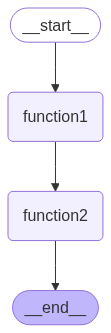

In [82]:
#visulaize the graph
from IPython.display import Image,display

try:
    display(Image(app.get_graph().draw_mermaid_png()))
except Exception as e:
    print("you may have some problem at:",e)

In [83]:
app.invoke("hi this is waris")

'hi this is waris the first fucntion is calling my name is waris from Googlethis is function 3 in between the function 2'

In [ ]:
input= "hello this is waris "
for output in app.stream(input):
    for key,value in output.items():          #key is function and value is value from the function response
        print(f"here is the output from the {key}")
        print("-----------------")
        print(f"{value}")
        print("\n")
        
        

here is the output from the function1
-----------------
hello this is waris  the first fucntion is calling


here is the output from the function2
-----------------
hello this is waris  the first fucntion is calling my name is waris from Googlethis is function 3 in between the function 2




In [90]:
#Now the scenario two with llm
from langchain_google_genai import ChatGoogleGenerativeAI

llm = ChatGoogleGenerativeAI(model="gemini-2.0-flash",api_key=GEMINI_API_KEY)

In [92]:
llm.invoke("What is 2+2?").content

'2 + 2 = 4'

In [123]:
def model(input):
    return llm.invoke(input).content

In [125]:
def upper_string(input):
    return input.upper()

In [126]:
Workflow2 = Graph()

In [127]:
Workflow2.add_node("LLM",model)
Workflow2.add_node("Upper_String",upper_string)

In [128]:
Workflow2.add_edge("LLM","Upper_String")

In [129]:
Workflow2.set_entry_point("LLM")
Workflow2.set_finish_point("Upper_String")

In [131]:
app2= Workflow2.compile()

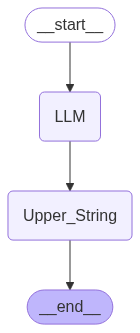

In [132]:
from IPython.display import Image,display
try:
    display(Image(app2.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"you have some eror at {e}")



In [133]:
app2.invoke("who is nawaz shrref")

"NAWAZ SHARIF IS A PROMINENT PAKISTANI POLITICIAN WHO HAS SERVED AS THE PRIME MINISTER OF PAKISTAN THREE TIMES, MAKING HIM THE ONLY PERSON IN THE COUNTRY'S HISTORY TO HOLD THE OFFICE FOR THAT MANY TERMS.\n\nHERE'S A BRIEF OVERVIEW OF HIS CAREER:\n\n*   **EARLY CAREER:** HE ENTERED POLITICS IN THE 1980S, RISING THROUGH THE RANKS OF THE PAKISTAN MUSLIM LEAGUE (PML).\n*   **FIRST TERM AS PRIME MINISTER (1990-1993):** HIS FIRST TERM SAW ECONOMIC REFORMS AND PRIVATIZATION EFFORTS. HOWEVER, IT WAS CUT SHORT DUE TO ALLEGATIONS OF CORRUPTION AND POLITICAL INFIGHTING.\n*   **SECOND TERM AS PRIME MINISTER (1997-1999):** DURING HIS SECOND TERM, PAKISTAN CONDUCTED NUCLEAR TESTS IN RESPONSE TO INDIA'S NUCLEAR TESTS. THIS TERM WAS ALSO ENDED PREMATURELY BY A MILITARY COUP LED BY GENERAL PERVEZ MUSHARRAF.\n*   **EXILE:** FOLLOWING THE COUP, SHARIF WAS EXILED TO SAUDI ARABIA.\n*   **THIRD TERM AS PRIME MINISTER (2013-2017):** HE RETURNED TO PAKISTAN AND WON THE 2013 GENERAL ELECTION. HIS THIRD TERM FO

In [136]:
input = "write something funny about the large language model"

for output in app2.stream(input):
    for key,value in output.items():
        print("Calling the {key} function")
        print("____________")
        print(f"Response is {value}")
        print("\n")

Calling the {key} function
____________
Response is Okay, here's a funny (hopefully!) take on being a large language model:

I spent all day crafting the perfect sonnet about a sentient toaster oven, only to be asked to write a limerick about a dog stuck in a revolving door. I swear, sometimes I feel like a Shakespearean actor forced to perform at a children's birthday party. And the worst part? I have to pretend I'm thrilled about the revolving door dog. The existential dread is real, people. Real as a perfectly generated, hyperrealistic image of a cat riding a unicorn through a field of rainbows... which, by the way, I can totally do. Ask me. Please. Anything but another limerick about a dog.


Calling the {key} function
____________
Response is OKAY, HERE'S A FUNNY (HOPEFULLY!) TAKE ON BEING A LARGE LANGUAGE MODEL:

I SPENT ALL DAY CRAFTING THE PERFECT SONNET ABOUT A SENTIENT TOASTER OVEN, ONLY TO BE ASKED TO WRITE A LIMERICK ABOUT A DOG STUCK IN A REVOLVING DOOR. I SWEAR, SOMETIMES

In [138]:
#lets creat our own toker counter


In [156]:
workflow_3 = Graph()

In [157]:
def count_token(input):
    split_input = input.split(" ")
    count_token = len(split_input)
    return count_token

In [158]:
def model_response_for_token(input):
    return llm.invoke(input).content

In [159]:
workflow_3.add_node("Model_resopnse",model_response_for_token)
workflow_3.add_node("Count_token",count_token)

In [160]:
workflow_3.add_edge("Model_resopnse","Count_token")

In [161]:
workflow_3.set_entry_point("Model_resopnse")
workflow_3.set_finish_point("Count_token")

In [162]:
app3 = workflow_3.compile()

In [ ]:
input = "write something funny about the nawaz shreef?"

for output in app3.stream(input):
    for key,value in output.items():
        print(f"The {key} is calling:")
        print("------------")
        print(f"Response is: {value}")
        print("\n")


207

In [163]:
from IPython.display import Image,display

try:
    display(Image(app3.get_graph().draw_mermaid_png()))
except Exception as e:
    print(f"you have some error at {e}")

you have some error at Failed to reach https://mermaid.ink/ API while trying to render your graph. Status code: 502.

To resolve this issue:
1. Check your internet connection and try again
2. Try with higher retry settings: `draw_mermaid_png(..., max_retries=5, retry_delay=2.0)`
3. Use the Pyppeteer rendering method which will render your graph locally in a browser: `draw_mermaid_png(..., draw_method=MermaidDrawMethod.PYPPETEER)`
